In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import re
import csv
from scipy import stats, integrate
from scipy.stats import spearmanr
%matplotlib inline

In [2]:
employee = pd.read_csv('Employee-Attrition.csv', encoding = "ISO-8859-1")

In [3]:
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

# Exploring the dataset

## Selecting Outcome Variable

My outcome variable will be attrition. I will select several categorical and continuous variable to allow me to explore my data and then create features. 

In [4]:
AttritionData = employee.loc[:, ['Age','Attrition','Department','DistanceFromHome','EnvironmentSatisfaction','Gender',
                              'JobSatisfaction','MonthlyIncome','YearsAtCompany','PerformanceRating',
                              'RelationshipSatisfaction','YearsInCurrentRole','WorkLifeBalance']]

In [5]:
#I begin exploring my data by seeing how long the dataset is. 
print(len(AttritionData))

1470


In [6]:
#Next I am going to check for the number of unique data points in each column so that I can separate the categorical
# from the continuous variables. 
def VariableType(data):
    for item in data:
        print(len(set(AttritionData[item])))

In [7]:
VariableType(AttritionData.columns)

43
2
3
29
4
2
4
1349
37
2
4
19
4


In [8]:
#Before I go any further I want to check in there are any null values in my dataset
print(AttritionData.isnull().sum())

Age                         0
Attrition                   0
Department                  0
DistanceFromHome            0
EnvironmentSatisfaction     0
Gender                      0
JobSatisfaction             0
MonthlyIncome               0
YearsAtCompany              0
PerformanceRating           0
RelationshipSatisfaction    0
YearsInCurrentRole          0
WorkLifeBalance             0
dtype: int64


In [9]:
#I am visualizing all the continuous data points with a QQ polt and a histogram
def ContinuousData(data):
    for item in data:
        #I start by selecting the columns with more than 10 unique values.
        if len(set(AttritionData[item])) > 10:
            
            #Set up the figure size
            f, ax = plt.subplots(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            
            #Sort the values from the dataset
            result = AttritionData[item].sort_values()
            #Create a normal distribution variable
            norm = np.random.normal(0, 1, 1470)
            #Sort the values of the normal distribution
            norm.sort()
            #Create the QQ plot
            plt.plot(norm, result, "o")
            plt.ylabel(item)
            plt.title(item + ' vs Normal distribution')
            
            #Create the histogram of the dataset
            plt.subplot(1, 2, 2)
            plt.hist(result)
            plt.title(item)

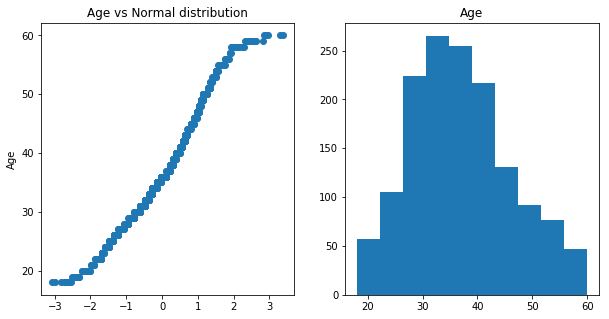

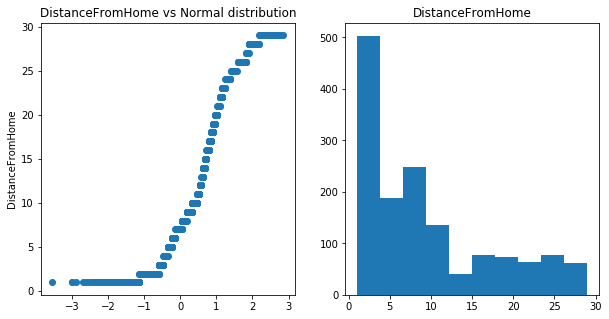

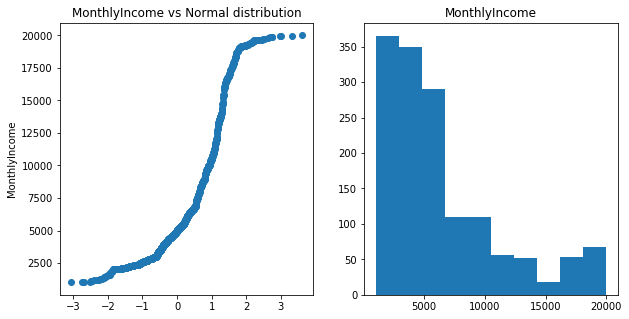

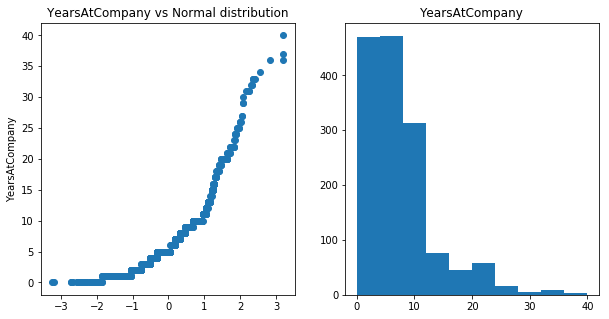

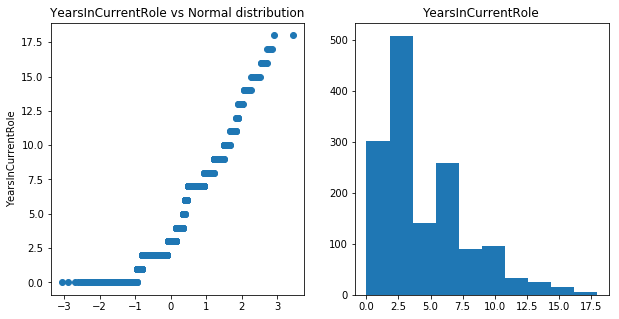

In [10]:
ContinuousData(AttritionData.columns)

In [11]:
#Next I isolate only the continuous variables so that I can visualize any correlation. 
continuous = AttritionData.loc[:, ['Age','DistanceFromHome','MonthlyIncome','YearsAtCompany','YearsInCurrentRole']]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


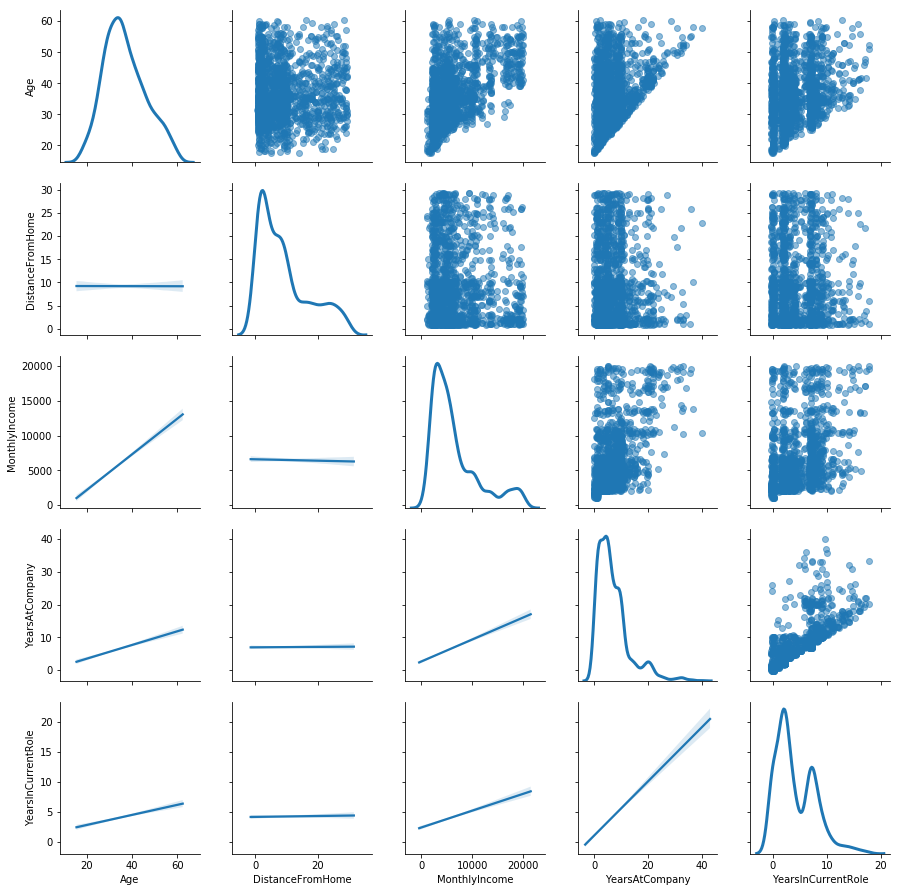

In [12]:
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(continuous.shape)),
    columns=continuous.columns
)
# Combine the data and the noise.
continuous = continuous.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(continuous.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

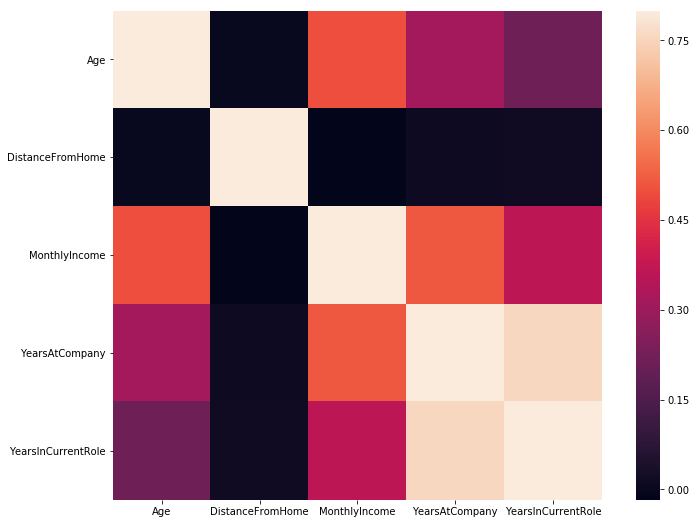

In [13]:
# Make the correlation matrix.
corrmat = continuous.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.

In [14]:
#This is a boxplot that compares each of the continuous variables to the attrition level. 
def BoxData(data):
    for item in data:
        f, ax = plt.subplots(figsize=(7, 5))
        ax = sns.boxplot(x=AttritionData.Attrition, y=item, data=data)

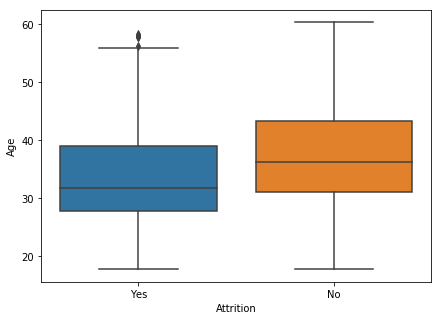

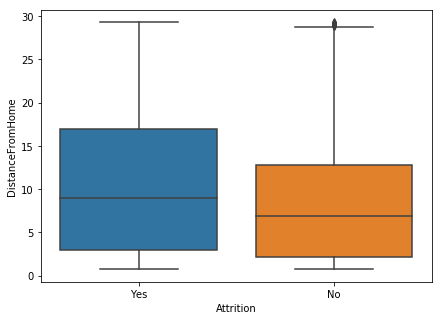

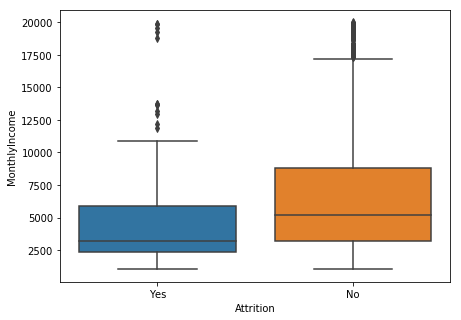

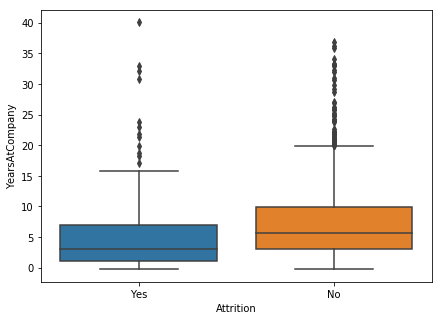

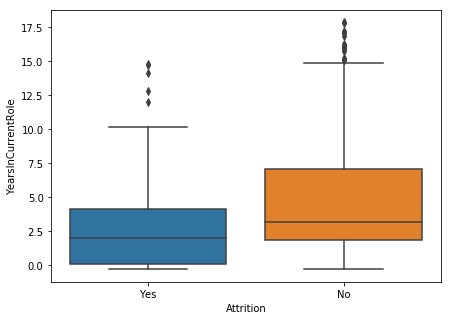

In [15]:
BoxData(continuous)

In [16]:
categories = AttritionData.loc[:, ['Attrition','Department','EnvironmentSatisfaction','Gender','JobSatisfaction',
                                   'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']]

In [17]:
#This is a barplot that counts the number of datapoints for each categorical item and the attrition number. 
def CategoryData(data):
    for item in data:
        f, ax = plt.subplots(figsize=(7, 5))
        # Plot counts for each combination of levels.
        sns.countplot(y=item, hue="Attrition", data=data, palette="Greens_d")
        plt.show()

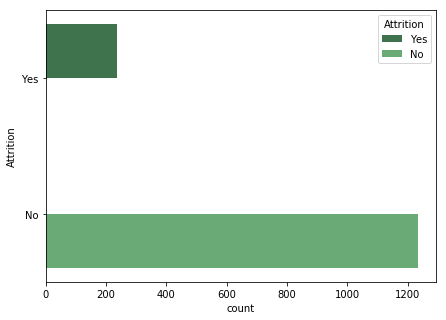

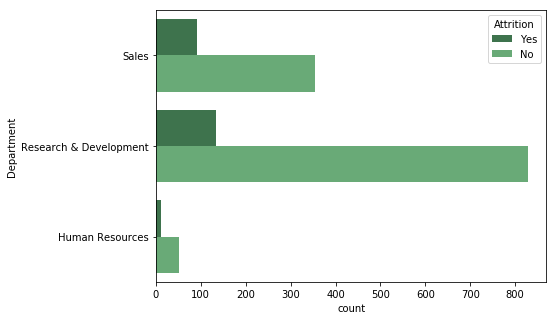

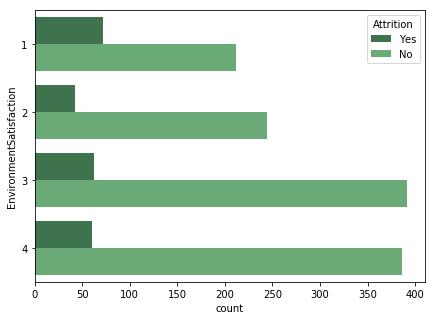

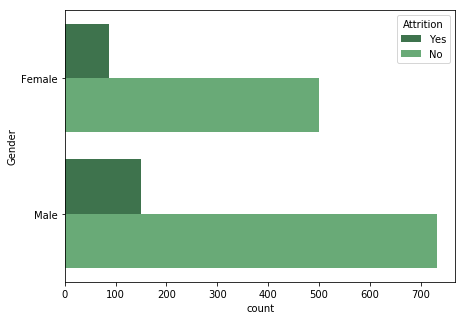

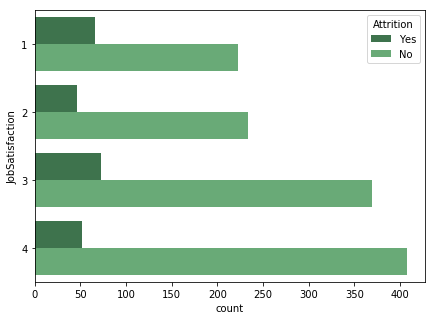

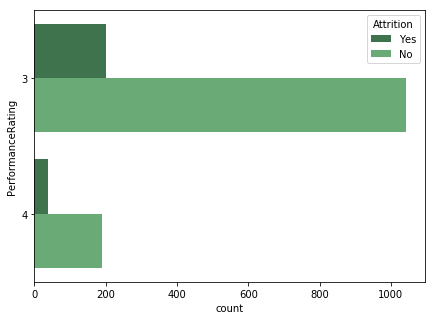

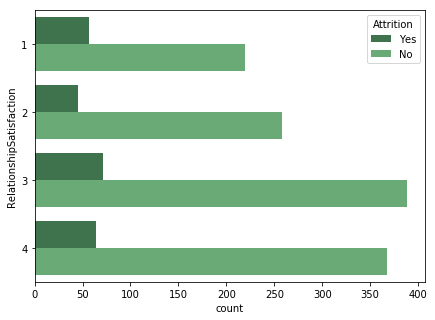

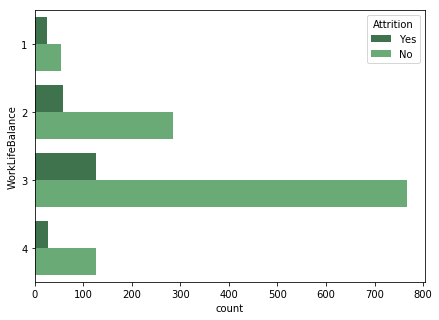

In [18]:
CategoryData(categories)

# Ten New Features

In [19]:
AttritionData.head()

,Age,Attrition,Department,DistanceFromHome,EnvironmentSatisfaction,Gender,JobSatisfaction,MonthlyIncome,YearsAtCompany,PerformanceRating,RelationshipSatisfaction,YearsInCurrentRole,WorkLifeBalance
0,41,Yes,Sales,1,2,Female,4,5993,6,3,1,4,1
1,49,No,Research & Development,8,3,Male,2,5130,10,4,4,7,3
2,37,Yes,Research & Development,2,4,Male,3,2090,0,3,2,0,3
3,33,No,Research & Development,3,4,Female,3,2909,8,3,3,7,3
4,27,No,Research & Development,2,1,Male,2,3468,2,3,4,2,3


### #1 Life Satisfaction Feature

I created a feature that multiplies the relationship and work life balance variables. I am trying to see if this new Life Satisfaction variable better correlates with the attrition rate than either the relationship satisfaction or the work life balance variables.

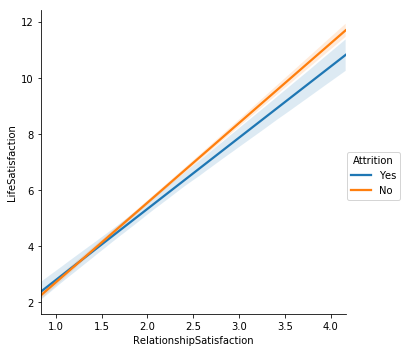

In [20]:
AttritionData['LifeSatisfaction'] = AttritionData['RelationshipSatisfaction'] * AttritionData['WorkLifeBalance']

# A plot of the interaction.
sns.lmplot(
    x='RelationshipSatisfaction',
    y='LifeSatisfaction',
    hue='Attrition',
    data=AttritionData,
    scatter=False
)
plt.show()

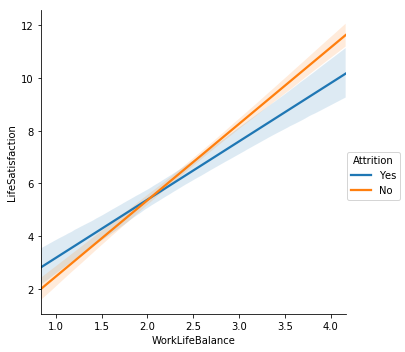

In [21]:
# A plot of the interaction.
sns.lmplot(
    x='WorkLifeBalance',
    y='LifeSatisfaction',
    hue='Attrition',
    data=AttritionData,
    scatter=False
)
plt.show()

### #2 Work Satisfaction Feature

Next I will see if multiplying the Environment and Job Satisfactions creates a feature that affects the attrition rate than either variable isolated. 

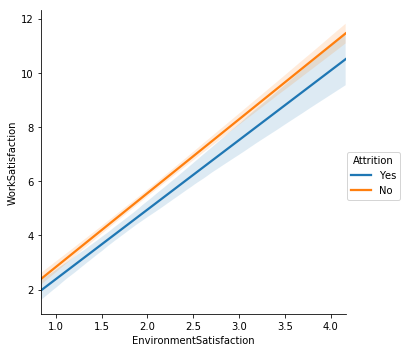

In [22]:
AttritionData['WorkSatisfaction'] = AttritionData['EnvironmentSatisfaction'] * AttritionData['JobSatisfaction']

# A plot of the interaction.
sns.lmplot(
    x='EnvironmentSatisfaction',
    y='WorkSatisfaction',
    hue='Attrition',
    data=AttritionData,
    scatter=False
)
plt.show()

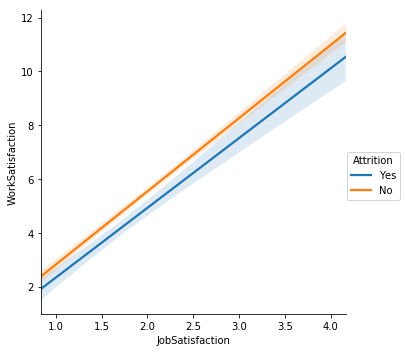

In [23]:
# A plot of the interaction.
sns.lmplot(
    x='JobSatisfaction',
    y='WorkSatisfaction',
    hue='Attrition',
    data=AttritionData,
    scatter=False
)
plt.show()

### #3 Hands On Feature

Now I am creating a feature for job roles where employees work in a hands-on position rather than managerial. I then printed a crosstab that showed the amount of attrition for the hands-on and the non-technical roles. As you can see, while the number of the hands-on jobs is smaller than the managerial jobs, the amount of attrition is a larger percentage of the technical jobs than the managerial roles. 

In [24]:
AttritionData['HandsOn'] = np.where((employee['JobRole'].isin(['Research Scientist','Laboratory Technician'])),1,0)

print(pd.crosstab(AttritionData['HandsOn'],AttritionData['Attrition']))

Attrition   No  Yes
HandsOn            
0          791  128
1          442  109


### #4 High Income Feature

This is a feature that separates monthly income into the higher and lower levels. I then graph this data to see if it better relates to the attrition rate than only the monthly income level. 

In [25]:
AttritionData['High_Income'] = np.where(AttritionData['MonthlyIncome']>10000, 1,0)

# Check to make sure it worked.
print(AttritionData['MonthlyIncome'].groupby(AttritionData['High_Income']).describe())

              count          mean          std      min      25%      50%  \
High_Income                                                                 
0            1189.0   4535.847771  2114.622229   1009.0   2703.0   4257.0   
1             281.0  14826.284698  3370.018498  10008.0  11245.0  14118.0   

                 75%      max  
High_Income                    
0             5772.0   9998.0  
1            17875.0  19999.0  


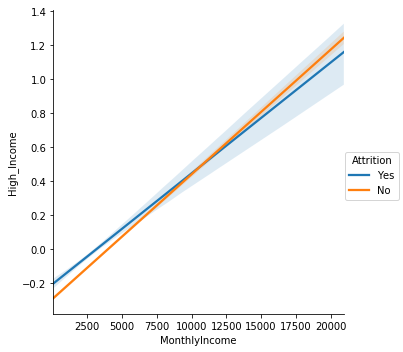

In [26]:
# A plot of the interaction.
sns.lmplot(
    x='MonthlyIncome',
    y='High_Income',
    hue='Attrition',
    data=AttritionData,
    scatter=False
)
plt.show()

### #5 Job Dissatisfaction Feature

This features creates an opposite of the Job Satisfaction variable so that it is easier to compare the reported job satisfaction level to the attrition rate.

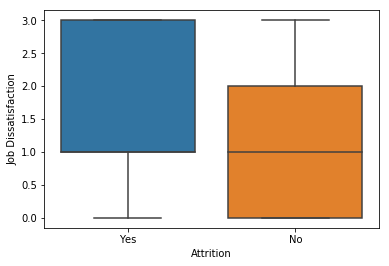

In [27]:
AttritionData['Job_Dissatisfaction'] = max(AttritionData['JobSatisfaction']) - AttritionData['JobSatisfaction']

sns.boxplot(
    AttritionData['Attrition'],
    AttritionData['Job_Dissatisfaction'],
)
plt.xlabel('Attrition')
plt.ylabel('Job Dissatisfaction')
plt.show()

### #6 New Employee Feature

This feature is trying to see if rate of attrition particularly affects newly hired employees. As you can see from the crosstab, over half of the employees hired within one year leave. 

In [28]:
AttritionData['New_employee'] = np.where(AttritionData['YearsAtCompany'] <= 1, 1, 0)

print(pd.crosstab(AttritionData['New_employee'],AttritionData['Attrition']))

Attrition       No  Yes
New_employee           
0             1093  162
1              140   75


### #7 Loyalty Feature

The Loyalty feature is seeing if the summed up years in a job position and at the company can better predict attrition than either variable alone.

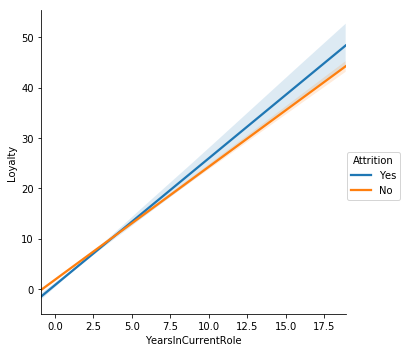

In [29]:
AttritionData['Loyalty'] = AttritionData['YearsInCurrentRole'] + AttritionData['YearsAtCompany']

# A plot of an interaction.
sns.lmplot(
    x='YearsInCurrentRole',
    y='Loyalty',
    hue='Attrition',
    data=AttritionData,
    scatter=False
)
plt.show()

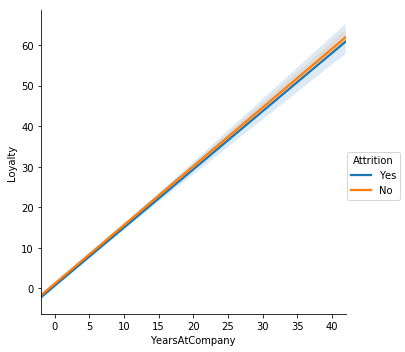

In [30]:
# A plot of the interaction.
sns.lmplot(
    x='YearsAtCompany',
    y='Loyalty',
    hue='Attrition',
    data=AttritionData,
    scatter=False
)
plt.show()

### #8 Poor Performance Feature

Part of the problem with this feature is that in the origical Performance Rating variable, all the employees listed their performance as a 3 or 4. This makes the poor performance variable only goes to a max of 1 for worse performance and 0 for the best performance. Even with this limitation, the majority of attritions are in the group with a lower performance. 

In [31]:
AttritionData['Poor_Performance'] = max(AttritionData['PerformanceRating']) - AttritionData['PerformanceRating']

print(pd.crosstab(AttritionData['Poor_Performance'],AttritionData['Attrition']))

Attrition           No  Yes
Poor_Performance           
0                  189   37
1                 1044  200


### #9 Bad and Unhappy Feature

Now I want to combine the poor performance feature and the dissatisfied feature to see if together they can better predict the attrition. 

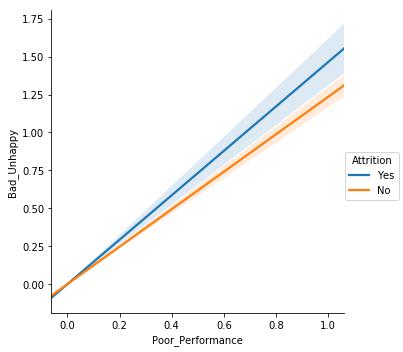

In [32]:
AttritionData['Bad_Unhappy'] = AttritionData['Poor_Performance'] * AttritionData['Job_Dissatisfaction']

# A plot of the interaction.
sns.lmplot(
    x='Poor_Performance',
    y='Bad_Unhappy',
    hue='Attrition',
    data=AttritionData,
    scatter=False
)
plt.show()

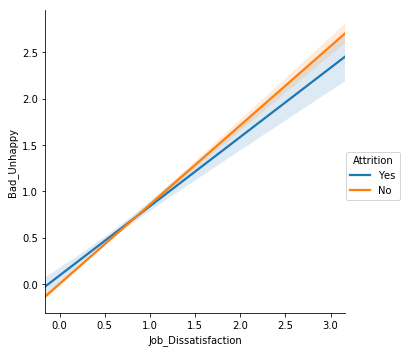

In [33]:
# A plot of the interaction.
sns.lmplot(
    x='Job_Dissatisfaction',
    y='Bad_Unhappy',
    hue='Attrition',
    data=AttritionData,
    scatter=False
)
plt.show()

### #10 New and Unhappy Feature

This is a feature to see if both the new employees and job dissatisfaction can better predict the attrition rate than either variable alone. 

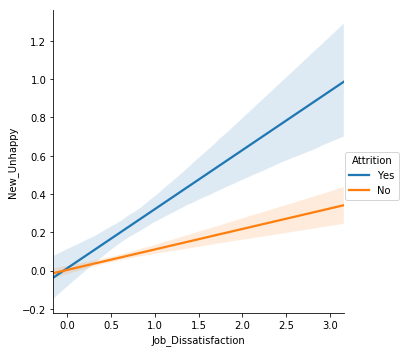

In [34]:
AttritionData['New_Unhappy'] = AttritionData['New_employee'] * AttritionData['Job_Dissatisfaction']

# A plot of the interaction.
sns.lmplot(
    x='Job_Dissatisfaction',
    y='New_Unhappy',
    hue='Attrition',
    data=AttritionData,
    scatter=False
)
plt.show()

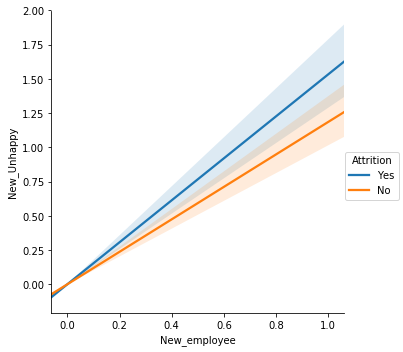

In [35]:
# A plot of the interaction.
sns.lmplot(
    x='New_employee',
    y='New_Unhappy',
    hue='Attrition',
    data=AttritionData,
    scatter=False
)
plt.show()

## Filtering the Features

In [44]:
# I've isolated my features from the dataset
feature = AttritionData.loc[:,['Attrition','LifeSatisfaction','WorkSatisfaction','HandsOn','High_Income',
                               'Job_Dissatisfaction','New_employee','Loyalty','Poor_Performance','Bad_Unhappy',
                               'New_Unhappy']]

In [45]:
# To help me create graphs, I am changing the 'Attrition' column to 1 and 0's. 
feature['Attrition'] = np.where(AttritionData['Attrition'] == 'Yes', 1, 0)

In [46]:
feature.head()

,Attrition,LifeSatisfaction,WorkSatisfaction,HandsOn,High_Income,Job_Dissatisfaction,New_employee,Loyalty,Poor_Performance,Bad_Unhappy,New_Unhappy
0,1,1,8,0,0,0,0,10,1,0,0
1,0,12,6,1,0,2,0,17,0,0,0
2,1,6,12,1,0,1,1,0,1,1,1
3,0,9,12,1,0,1,0,15,1,1,0
4,0,12,2,1,0,2,0,4,1,2,0


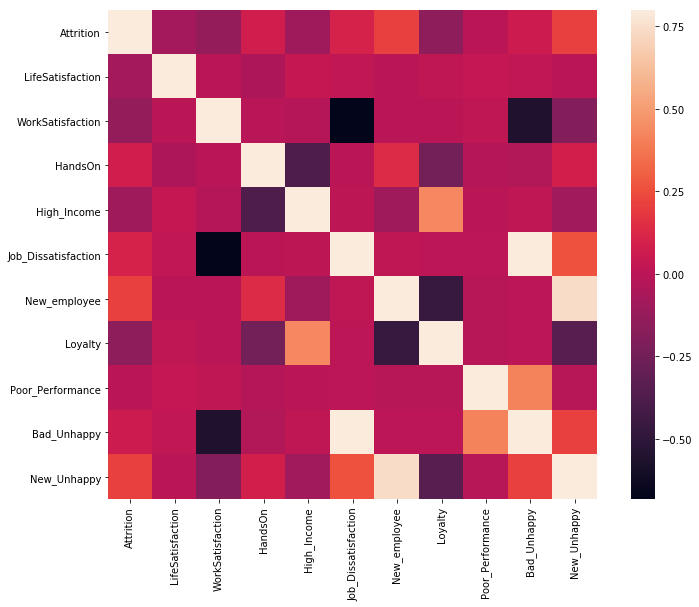

                     Attrition  LifeSatisfaction  WorkSatisfaction   HandsOn  \
Attrition             1.000000         -0.079237         -0.126752  0.077061   
LifeSatisfaction     -0.079237          1.000000         -0.002619 -0.048761   
WorkSatisfaction     -0.126752         -0.002619          1.000000 -0.007495   
HandsOn               0.077061         -0.048761         -0.007495  1.000000   
High_Income          -0.095521          0.039476         -0.018267 -0.376427   
Job_Dissatisfaction   0.103481          0.023627         -0.681991 -0.004534   
New_employee          0.211165         -0.000726         -0.005653  0.136851   
Loyalty              -0.152987          0.018440         -0.001731 -0.247022   
Poor_Performance     -0.002889          0.034551          0.016915 -0.024500   
Bad_Unhappy           0.063190          0.022232         -0.559747 -0.029675   
New_Unhappy           0.206455         -0.004070         -0.185407  0.084775   
TotalRate             0.354227          

In [47]:
corrmat = feature.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# Let's make some averages. Just in case some of the variables are on
# different scales than others (one ranges from 0 to 100, one ranges from 0 to
# 7, for example) we scale them before averaging by subtracting the average of
# each variable from all values in that variable, then dividing by the
# standard deviation.
means = feature.mean(axis=0)
stds = feature.std(axis=0)
feature['TotalRate'] = ((feature - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = feature
plotdf['TotalRate'] = feature['TotalRate']
corrmat2 = plotdf.corr()

print(corrmat2)

In [48]:
def PointPlot(data):
    for item in data:
        # A plot of the interaction.
        sns.pointplot(
            x='Attrition',
            y=item,
            data=feature
        )
        plt.show()

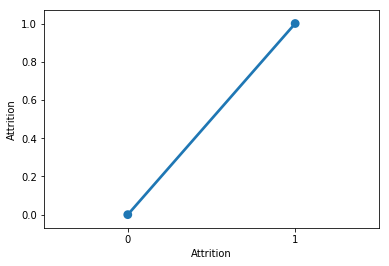

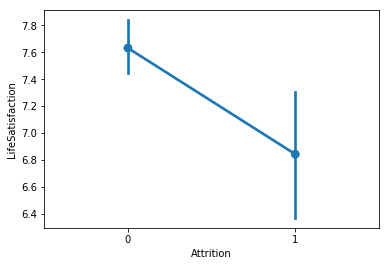

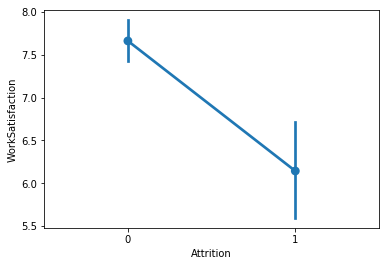

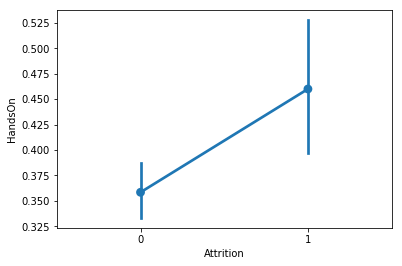

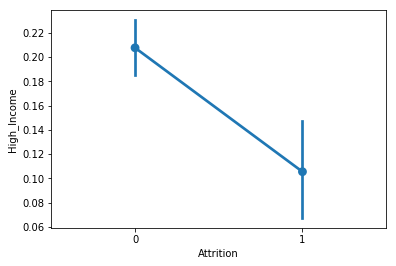

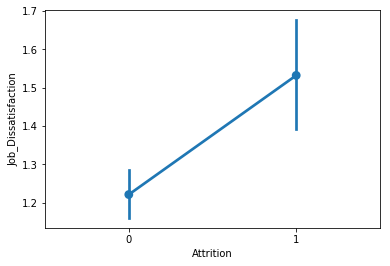

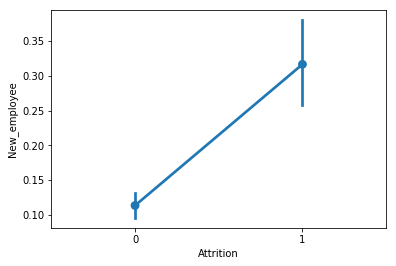

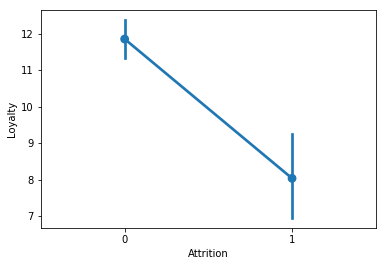

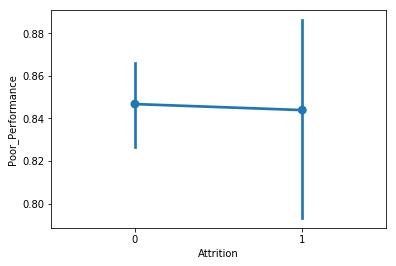

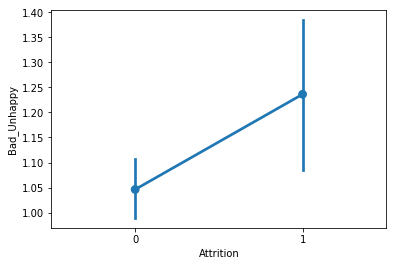

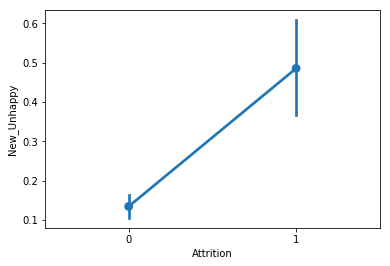

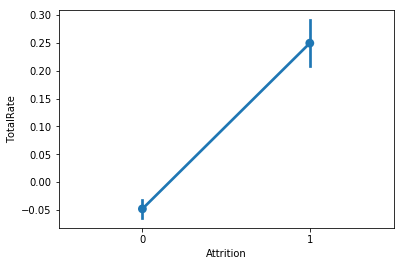

In [49]:
PointPlot(feature)

In [52]:
def BarPlot(data):
    for item in data:
        # A plot of the interaction.
        sns.barplot(
            x='Attrition',
            y=item,
            data=data
        )
        plt.show()

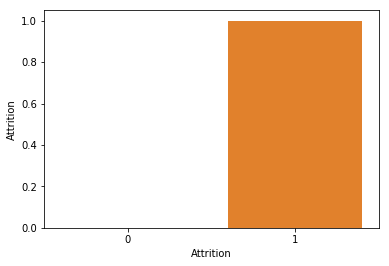

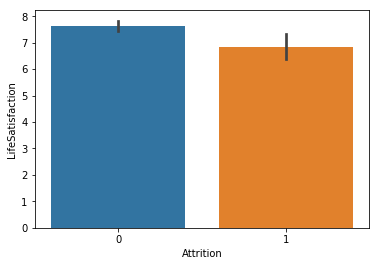

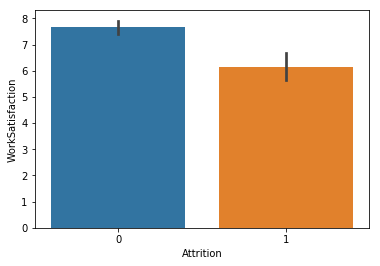

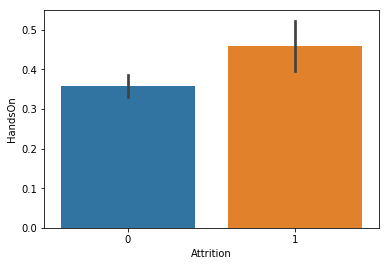

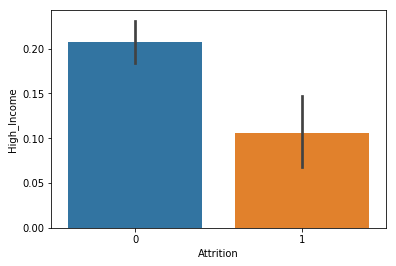

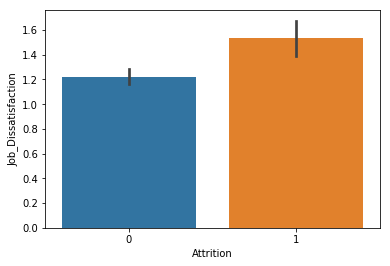

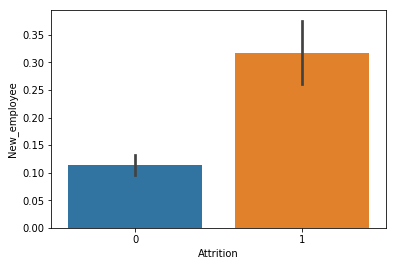

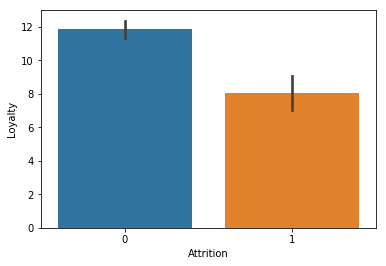

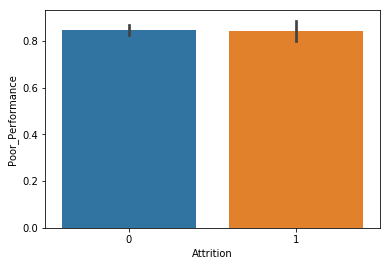

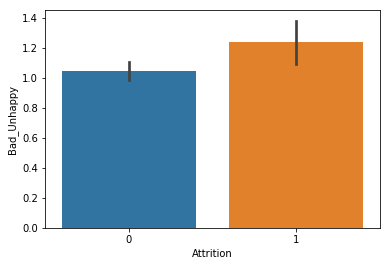

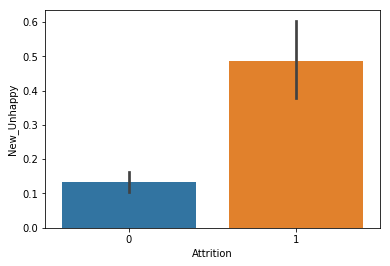

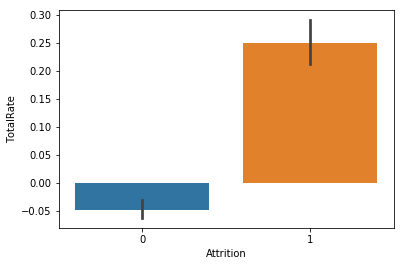

In [54]:
BarPlot(feature)

Based on my graphs and correlations from above I am going to select the New_employee(0.211165), New_Unhappy(0.206455), Job_Dissatisfaction(0.103481), Loyalty(-0.152987), and WorkSatisfaction(-0.126752) features. I am selecting these because their correlations with Attrition are the largest positive and negative correlations. 